In [1]:
import matplotlib.pyplot as plt
import numpy as np

Define a function $f(x) = \frac{1}{2} x^3 + \frac{\pi}{3} x + 2$

In [4]:
#define a function

def f(x):
  return 0.5 * x **3 + np.pi / 3 * x + 2

# Bisection Method

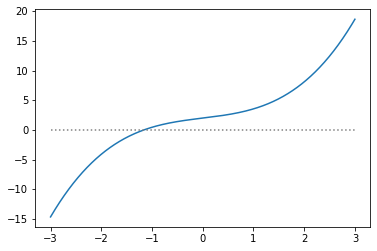

In [5]:
# First we plot the function

x = np.linspace(-3, 3, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, f(x))

# Also plot $y = 0$ so we can see virtually where the root lies

ax.plot(x, 0*x, linestyle=":", color="0.5")

There is a root ($y=0$) near $x = -1$ and on either side of this root the function goes from $f(x) < 0$ to $f(x) > 0$

Bisection method will find when the function does this change and therefore find the root.

Somewhere $x=-2$ and $x=-1$ there is the root so we will focus on this interval

In [7]:
# Set these endpoints and check that one is positive and one is negative
xl = -2
xr = -1

print(f(xl), f(xr))

-4.094395102393195 0.45280244880340237


In [8]:
# Let's find the midpoint value of the function for this interval

xm = 0.5 * (xl + xr)

print(f(xm))

-1.2582963267948966


Since $f(xm) < 0$ the root must be in $[xm, xr]$

Cut the range in half and repeat...........

Once the interval is small enough (i.e. the width is less than the error with which we want to find the root) then we stop

In [38]:
def bisec(xl, xr, func, tol=1.e-8):
  #first check if there is a root in the interval
  fl = f(xl)
  fr = f(xr)

  if fl*fr > 0:
    print("No root in the interval")
    return None

  # Now setup the iteration loop which will run until error < tol

  err = 1.e10
  xm = 0.5 * (xl + xr)
    
  while err > tol:
    fm = func(xm)

    if fl*fm > 0:
      # The root is in the right half of the interval
      xl = xm
      fl = fm

    else:
      # The root is in the left half of the interval
      xr = xm
      fr = fm

    xm = 0.5 * (xl + xr)
    err = np.abs(xr - xl) / np.abs(xm)

  return xm

In [39]:
# Now we can find the root of the function

x0 = bisec(-2, -1, f, tol=1.e-8)

print(x0, f(x0))

-1.1615653000772 -4.675163367551249e-09


This is pretty close to zero so not too bad and also the x point is in the interval and close to $x=-1$



Now let's try this again with a new function $g(x) = x^2$

In [40]:
def g(x):
  return x**2

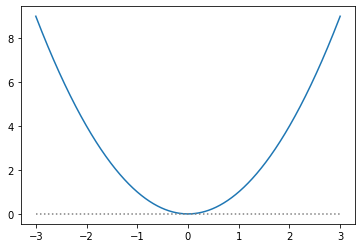

In [41]:
# First we plot the function

x = np.linspace(-3, 3, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, g(x))

# Also plot $y = 0$ so we can see virtually where the root lies

ax.plot(x, 0*x, linestyle=":", color="0.5")

Let's look in the interval $[-1, 1]$

In [43]:
bisec(-1, 1, g, tol=1.e-8)

No root in the interval


No root was found because the function $g(x)$ does not switch sign

# Newton-Raphson Method

Converges faster than the Bisection method. Instead of an interval where the root can be found we start with a guess and refine our guess.

Taylor expand around the guess: $f(x + \delta x) = f(x_0) + f'(x_0) \delta x + \mathcal{O}(\delta x^2)$

If the guess is good and $\delta x$ is small then we neglect the higher order terms. So $f(x + \delta x) \approx f(x_0) + f'(x_0) \delta x = 0 $

Take this approximation and solve for the correction $\delta x = -\frac{f(x_0)}{f'(x_0)} $

We correct our guess: $ x_0 → x_0 + \delta x $ and repeat until $ |\delta x| \ll |x| $

In [63]:
# First we need the derivative of the function

def fprime(x):
  return 1.5*x**2+np.pi/3.0

In [97]:
def newton(x0, func, funcprime, tol=1.e-8):
  err = 1.e2

  while err > tol:
    dx = -func(x0) / funcprime(x0)
    x0 += dx

    # Be careful not to divide by zero for |x| ~ 0
    if np.abs(x0) < tol:
      err = np.abs(dx)
    else:
      err = np.abs(dx) / np.abs(x0)

  return x0   

In [98]:
# Start with a guess and let the iteration take over

x0 = 3

newton(x0, f, fprime, tol=1.e-8)

-1.1615652985548652

Let's repeat the process for $g(x) = x^2$

In [99]:
def gprime(x):
  return 2 * x

x0 = 3

newton(x0, g, gprime)

5.587935447692871e-09

This method was able to find the root of $g(x)$ even though the function does not switch sign





Now what about multiple roots?

Consider $h(x) = x^4 - 2 x^3 + 1$

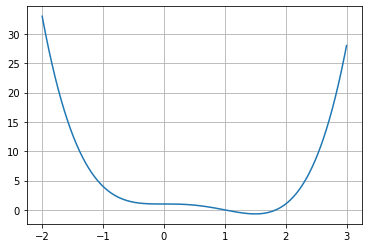

In [100]:
def h(x):
  return x**4 - 2*x**3 +1

def hprime(x):
  return 4*x**3 - 6*x**2

x=np.linspace(-2, 3, 1000)
plt.plot(x, h(x))
plt.grid()

In [110]:
x0 = -1000000.0

newton(x0, h, hprime)

1.839286755214161

In [111]:
x0 = 10000.0

newton(x0, h, hprime)

1.8392867552141612

Seems as though my code is coverging to the second root no matter my guess. This needs to be fixed